<a href="https://colab.research.google.com/github/Pakhi27/Types-of-Activation-Functions-sigmoid-tanh-relu-on-MNIST-DATASET/blob/main/Diffrent_types_of_Activation_Function_pyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch

import matplotlib.pyplot as plt
torch.manual_seed(2)

In [ ]:
# Logistic Function

In [2]:

# Create a tensor
z = torch.arange(-10, 10, 0.1,).view(-1, 1)

In [3]:
# Create a sigmoid object

sig = nn.Sigmoid()

In [4]:
# Make a prediction of sigmoid function

yhat = sig(z)

Text(0, 0.5, 'yhat')

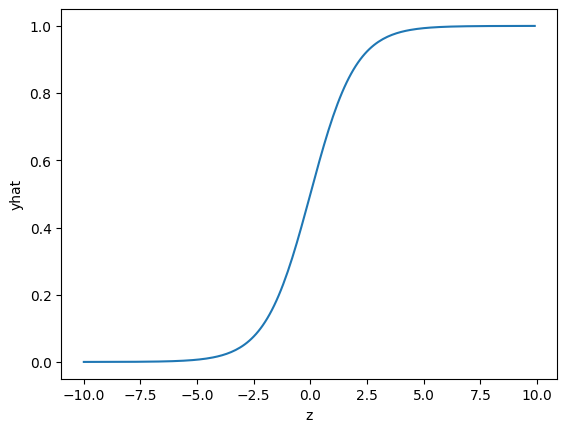

In [5]:
# Plot the result

plt.plot(z.detach().numpy(),yhat.detach().numpy())
plt.xlabel('z')
plt.ylabel('yhat')

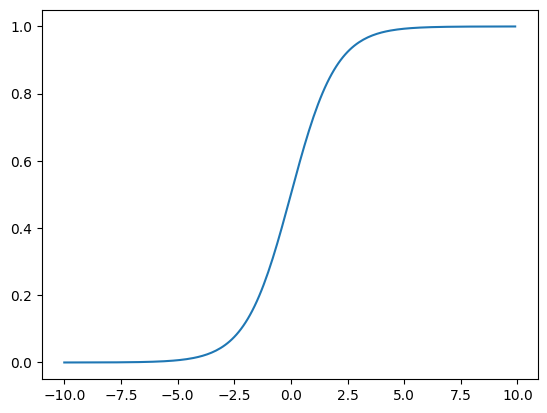

In [6]:
# Use the build in function to predict the result

yhat = torch.sigmoid(z)
plt.plot(z.numpy(), yhat.numpy())

plt.show()

In [ ]:
# Tan h

In [7]:
# Create a tanh object

TANH = nn.Tanh()

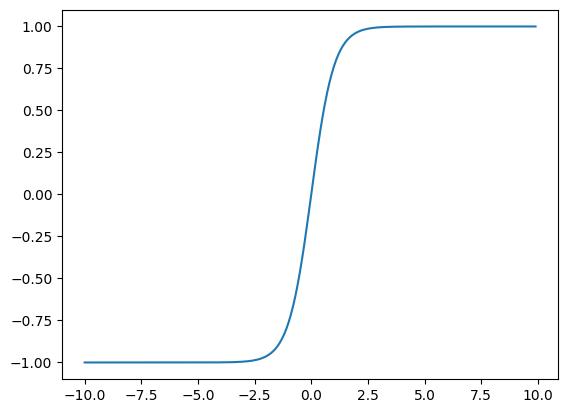

In [8]:
# Make the prediction using tanh object

yhat = TANH(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

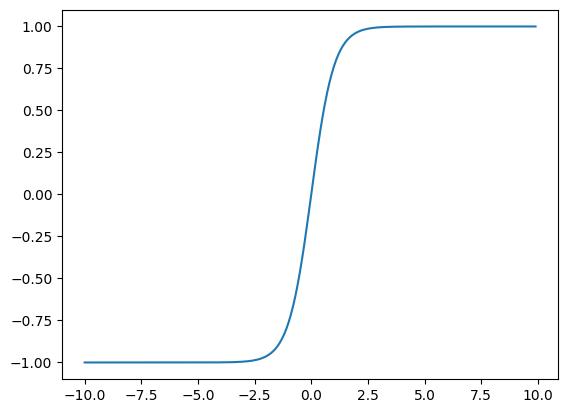

In [9]:
# Make the prediction using the build-in tanh object

yhat = torch.tanh(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

In [ ]:
# Relu

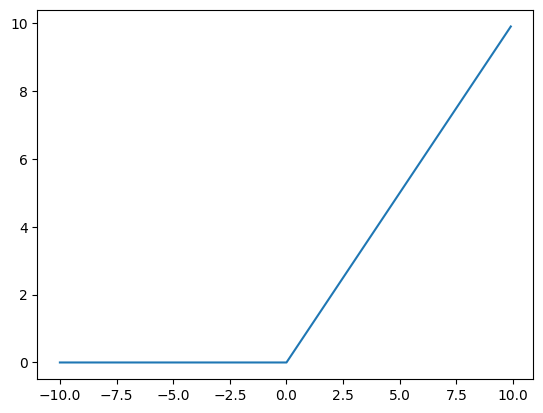

In [10]:
# Create a relu object and make the prediction

RELU = nn.ReLU()
yhat = RELU(z)
plt.plot(z.numpy(), yhat.numpy())

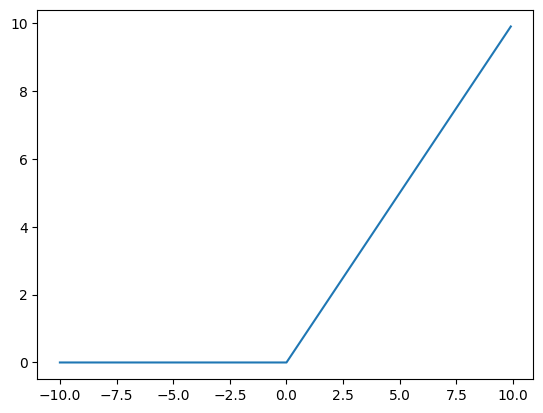

In [12]:
# Create a relu object and make the prediction

RELU = nn.ReLU()
yhat = RELU(z)
plt.plot(z.numpy(), yhat.numpy())

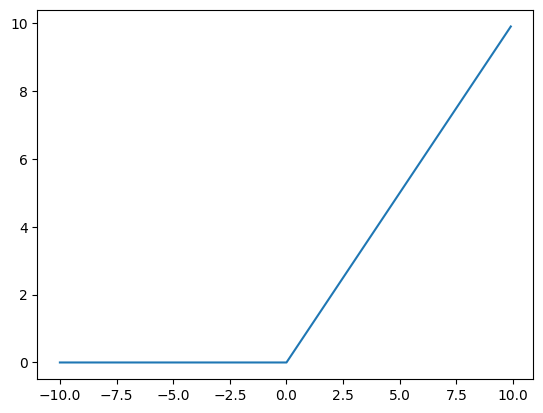

In [11]:
# Use the build-in function to make the prediction

yhat = torch.relu(z)
plt.plot(z.numpy(), yhat.numpy())
plt.show()

In [ ]:
# Compare Activation Functions ¶

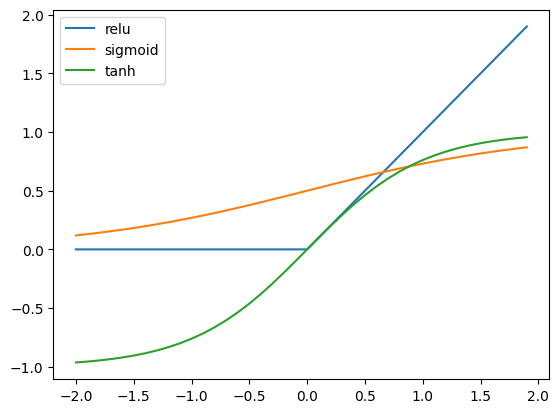

In [13]:
# Plot the results to compare the activation functions

x = torch.arange(-2, 2, 0.1).view(-1, 1)
plt.plot(x.numpy(), torch.relu(x).numpy(), label='relu')
plt.plot(x.numpy(), torch.sigmoid(x).numpy(), label='sigmoid')
plt.plot(x.numpy(), torch.tanh(x).numpy(), label='tanh')
plt.legend()

In [ ]:
# Diffrent activation Functions on MNIST DATASET

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import matplotlib.pylab as plt
import numpy as np

In [15]:
# Neural Network Module and Training Function
# Build the model with sigmoid function

class Net(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [16]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [17]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [18]:
# Define the function for training the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label=torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

In [ ]:
# Make Some Data-mnist dataset

In [19]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17510015.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 500697.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4515229.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7759889.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [20]:
# Create the validation  dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [21]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [22]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

In [ ]:
# Define the Neural Network, Criterion Function, Optimizer, and Train the Model

In [23]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [25]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

In [ ]:
# Test Sigmoid, Tanh, and Relu¶

In [26]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [27]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [28]:
# Train a model with Relu function

modelRelu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu,criterion, train_loader, validation_loader, optimizer, epochs=30)

In [ ]:
# Analyze Results¶

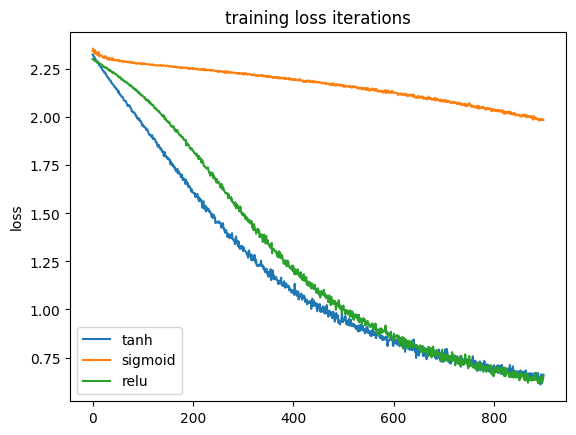

In [29]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()

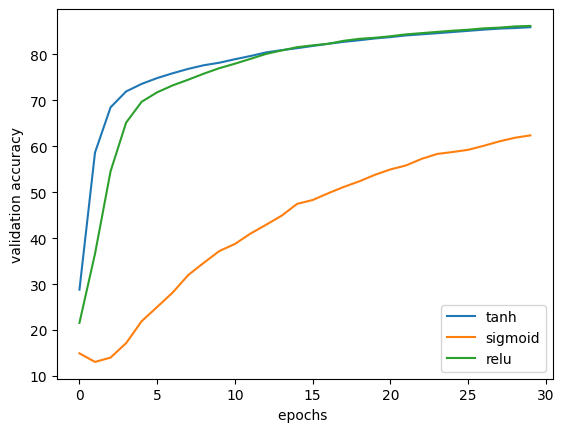

In [30]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()